# Phase 3:

## Balance Data:


### - Check if the data is balanced or not:


Number of Employees who Left: 237
Number of Employees who Stayed: 1233
___
Percentage of Employees who Left: 16.12%
Percentage of Employees who Stayed: 83.88%


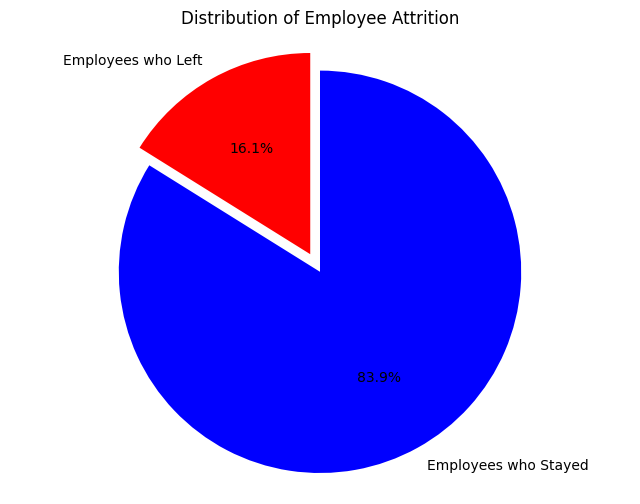

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Preprocessed_dataset.csv')
selector_values = data['Attrition']

num_class_1 = selector_values[selector_values == 1].count()
num_class_2 = selector_values[selector_values == 0].count()

total = num_class_1 + num_class_2
percentage_class_1 = (num_class_1 / total) * 100
percentage_class_2 = (num_class_2 / total) * 100

print("Number of Employees who Left:", num_class_1)
print("Number of Employees who Stayed:", num_class_2)
print("___")
print("Percentage of Employees who Left: {:.2f}%".format(percentage_class_1))
print("Percentage of Employees who Stayed: {:.2f}%".format(percentage_class_2))

labels = ['Employees who Left', 'Employees who Stayed']
sizes = [percentage_class_1, percentage_class_2]
colors = ['red', 'blue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Employee Attrition')
plt.show()


---

In the beginning, we reviewed the percentage for each of the two classes in the employee attrition analysis. The analysis showed that the number of employees who left the company was 237, while the number of employees who stayed was 1233.

The percentages were as follows:
- **Percentage of Employees who Left:** 16.12%
- **Percentage of Employees who Stayed:** 83.88%

From these results, we observe that the percentage of employees who left is relatively low compared to those who stayed. This indicates an imbalance in the distribution of classes, as the percentages do not fall within the 40% to 60% range.

--- 

### - Process of correcting data balancing:


In [116]:
import pandas as pd
from sklearn.utils import resample

data = pd.read_csv('Preprocessed_dataset.csv')

num_left = len(data[data['Attrition'] == 1])
num_stayed = len(data[data['Attrition'] == 0])

left_data = data[data['Attrition'] == 1]
stayed_data = data[data['Attrition'] == 0]

target_left = int(num_stayed * 0.6)
target_stayed = int(num_left * 1.5)

if num_left > target_left:
    undersampled_left = resample(left_data, replace=False, n_samples=target_left, random_state=42)
    final_data = pd.concat([undersampled_left, stayed_data])
else:
    final_data = data

if num_stayed > target_stayed:
    undersampled_stayed = resample(stayed_data, replace=False, n_samples=target_stayed, random_state=42)
    final_data = pd.concat([left_data, undersampled_stayed])
else:
    final_data = data

final_data.to_csv('AfterBalance.csv', index=False)

print("Final number of Employees who Left:", len(final_data[final_data['Attrition'] == 1]))
print("Final number of Employees who Stayed:", len(final_data[final_data['Attrition'] == 0]))




Final number of Employees who Left: 237
Final number of Employees who Stayed: 355


---

By using the "resample" function, we adjusted the number of samples in the majority class (employees who stayed) to achieve balance between the two classes. This helps prevent the model from being biased towards the majority class and improves its ability to generalize to new data. The final number of employees who left is 237, while the number of employees who stayed is 355, reflecting a more balanced representation of the classes.

--- 

### - Data after the balancing process:


Percentage of Employees who Left: 40.03%
Percentage of Employees who Stayed: 59.97%


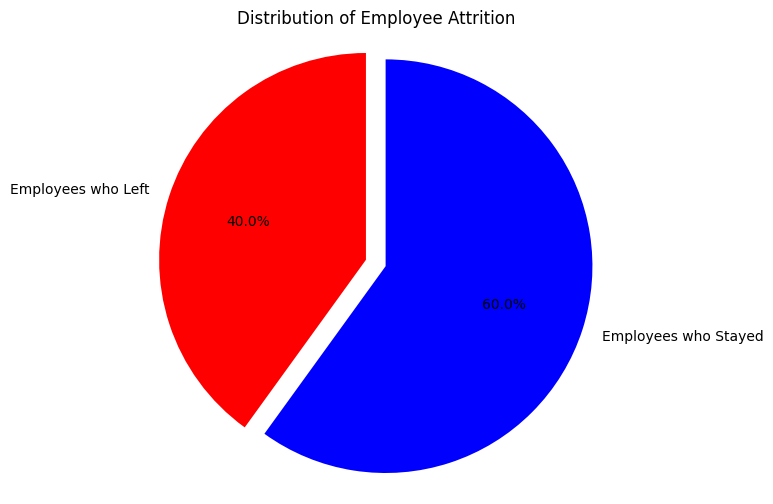

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AfterBalance.csv')

selector_values = data['Attrition']

num_left = selector_values[selector_values == 1].count()
num_stayed = selector_values[selector_values == 0].count()

total = num_left + num_stayed
percentage_left = (num_left / total) * 100
percentage_stayed = (num_stayed / total) * 100

print("Percentage of Employees who Left: {:.2f}%".format(percentage_left))
print("Percentage of Employees who Stayed: {:.2f}%".format(percentage_stayed))

labels = ['Employees who Left', 'Employees who Stayed']
sizes = [percentage_left, percentage_stayed]
colors = ['red', 'blue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Employee Attrition')
plt.show()


---

Percentage of Employees who Left: 40.03%  
Percentage of Employees who Stayed: 59.97%  

We finally calculated the percentage for each class to ensure that the data has become balanced. The two classes represent employees who left and employees who stayed, and it is indeed balanced as the percentage of each class ranges from 40% to 60%.

---

## Loading data:


View data to determine the Class Label and its location



In [118]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
data = pd.read_csv('AfterBalance.csv')
print(data)

     Age  Attrition BusinessTravel  DailyRate              Department  \
0     41          1  Travel_Rarely     0.1102                   Sales   
1     37          1  Travel_Rarely     0.1373  Research & Development   
2     28          1  Travel_Rarely     0.0103  Research & Development   
3     36          1  Travel_Rarely     0.1218                   Sales   
4     34          1  Travel_Rarely     0.0699  Research & Development   
..   ...        ...            ...        ...                     ...   
587   29          0  Travel_Rarely     0.0665  Research & Development   
588   29          0  Travel_Rarely     0.1389  Research & Development   
589   44          0  Travel_Rarely     0.0986  Research & Development   
590   48          0  Travel_Rarely     0.1221                   Sales   
591   32          0  Travel_Rarely     0.1062  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
0                0.01          2  Life Sciences          

## Feature Selection:

chooses the variables (features) to be utilized in training, which are kept in the variable "X," as well as the variable from the dataset that has the right classifications (class labels), which is kept in the variable "y."

In [119]:
fn = data.columns[:-1].tolist() 
X = data[fn]
y = data['Attrition']  

print(X)

     Age  Attrition BusinessTravel  DailyRate              Department  \
0     41          1  Travel_Rarely     0.1102                   Sales   
1     37          1  Travel_Rarely     0.1373  Research & Development   
2     28          1  Travel_Rarely     0.0103  Research & Development   
3     36          1  Travel_Rarely     0.1218                   Sales   
4     34          1  Travel_Rarely     0.0699  Research & Development   
..   ...        ...            ...        ...                     ...   
587   29          0  Travel_Rarely     0.0665  Research & Development   
588   29          0  Travel_Rarely     0.1389  Research & Development   
589   44          0  Travel_Rarely     0.0986  Research & Development   
590   48          0  Travel_Rarely     0.1221                   Sales   
591   32          0  Travel_Rarely     0.1062  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
0                0.01          2  Life Sciences          

# Data Mining Technique


## Classification:


### Information Gain (entropy):


#### -Splitting Data into: 70% Training and 30% Test


The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('AfterBalance.csv')
selector_values = data['Attrition']
fn = data.columns[:-1].tolist()
X = pd.get_dummies(data[fn])  
y = selector_values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


### Confusion Matrix:

Confusion Matrix:
[[82 18]
 [35 43]]


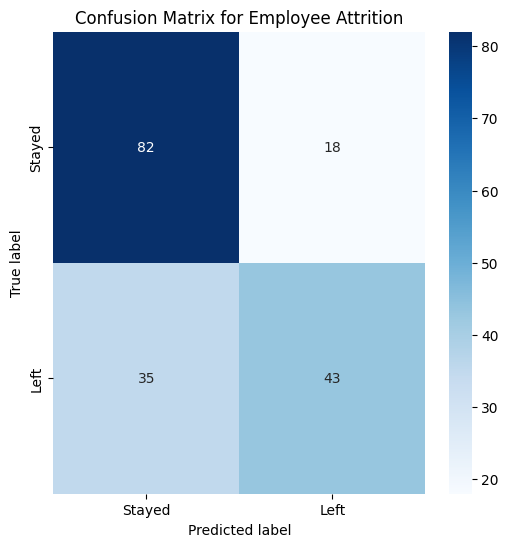

In [128]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.title("Confusion Matrix for Employee Attrition")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

---

Based on the confusion matrix shown in the image:

The matrix is a 2x2 array that summarizes the model's performance in classifying employee attrition data:

- **Top-left cell (True Negatives - TN)**: Represents 82 instances correctly predicted as "Stayed."
- **Top-right cell (False Positives - FP)**: Represents 18 instances incorrectly predicted as "Stayed" when they actually "Left."
- **Bottom-left cell (False Negatives - FN)**: Represents 35 instances incorrectly predicted as "Left" when they actually "Stayed."
- **Bottom-right cell (True Positives - TP)**: Represents 43 instances correctly predicted as "Left."

This confusion matrix helps us assess the model's performance. Visualizing it allows us to interpret the results easily, identifying areas where the model performs well (True Positives and True Negatives) and areas where it could be improved (False Positives and False Negatives).

---

### Show Decision Trees:



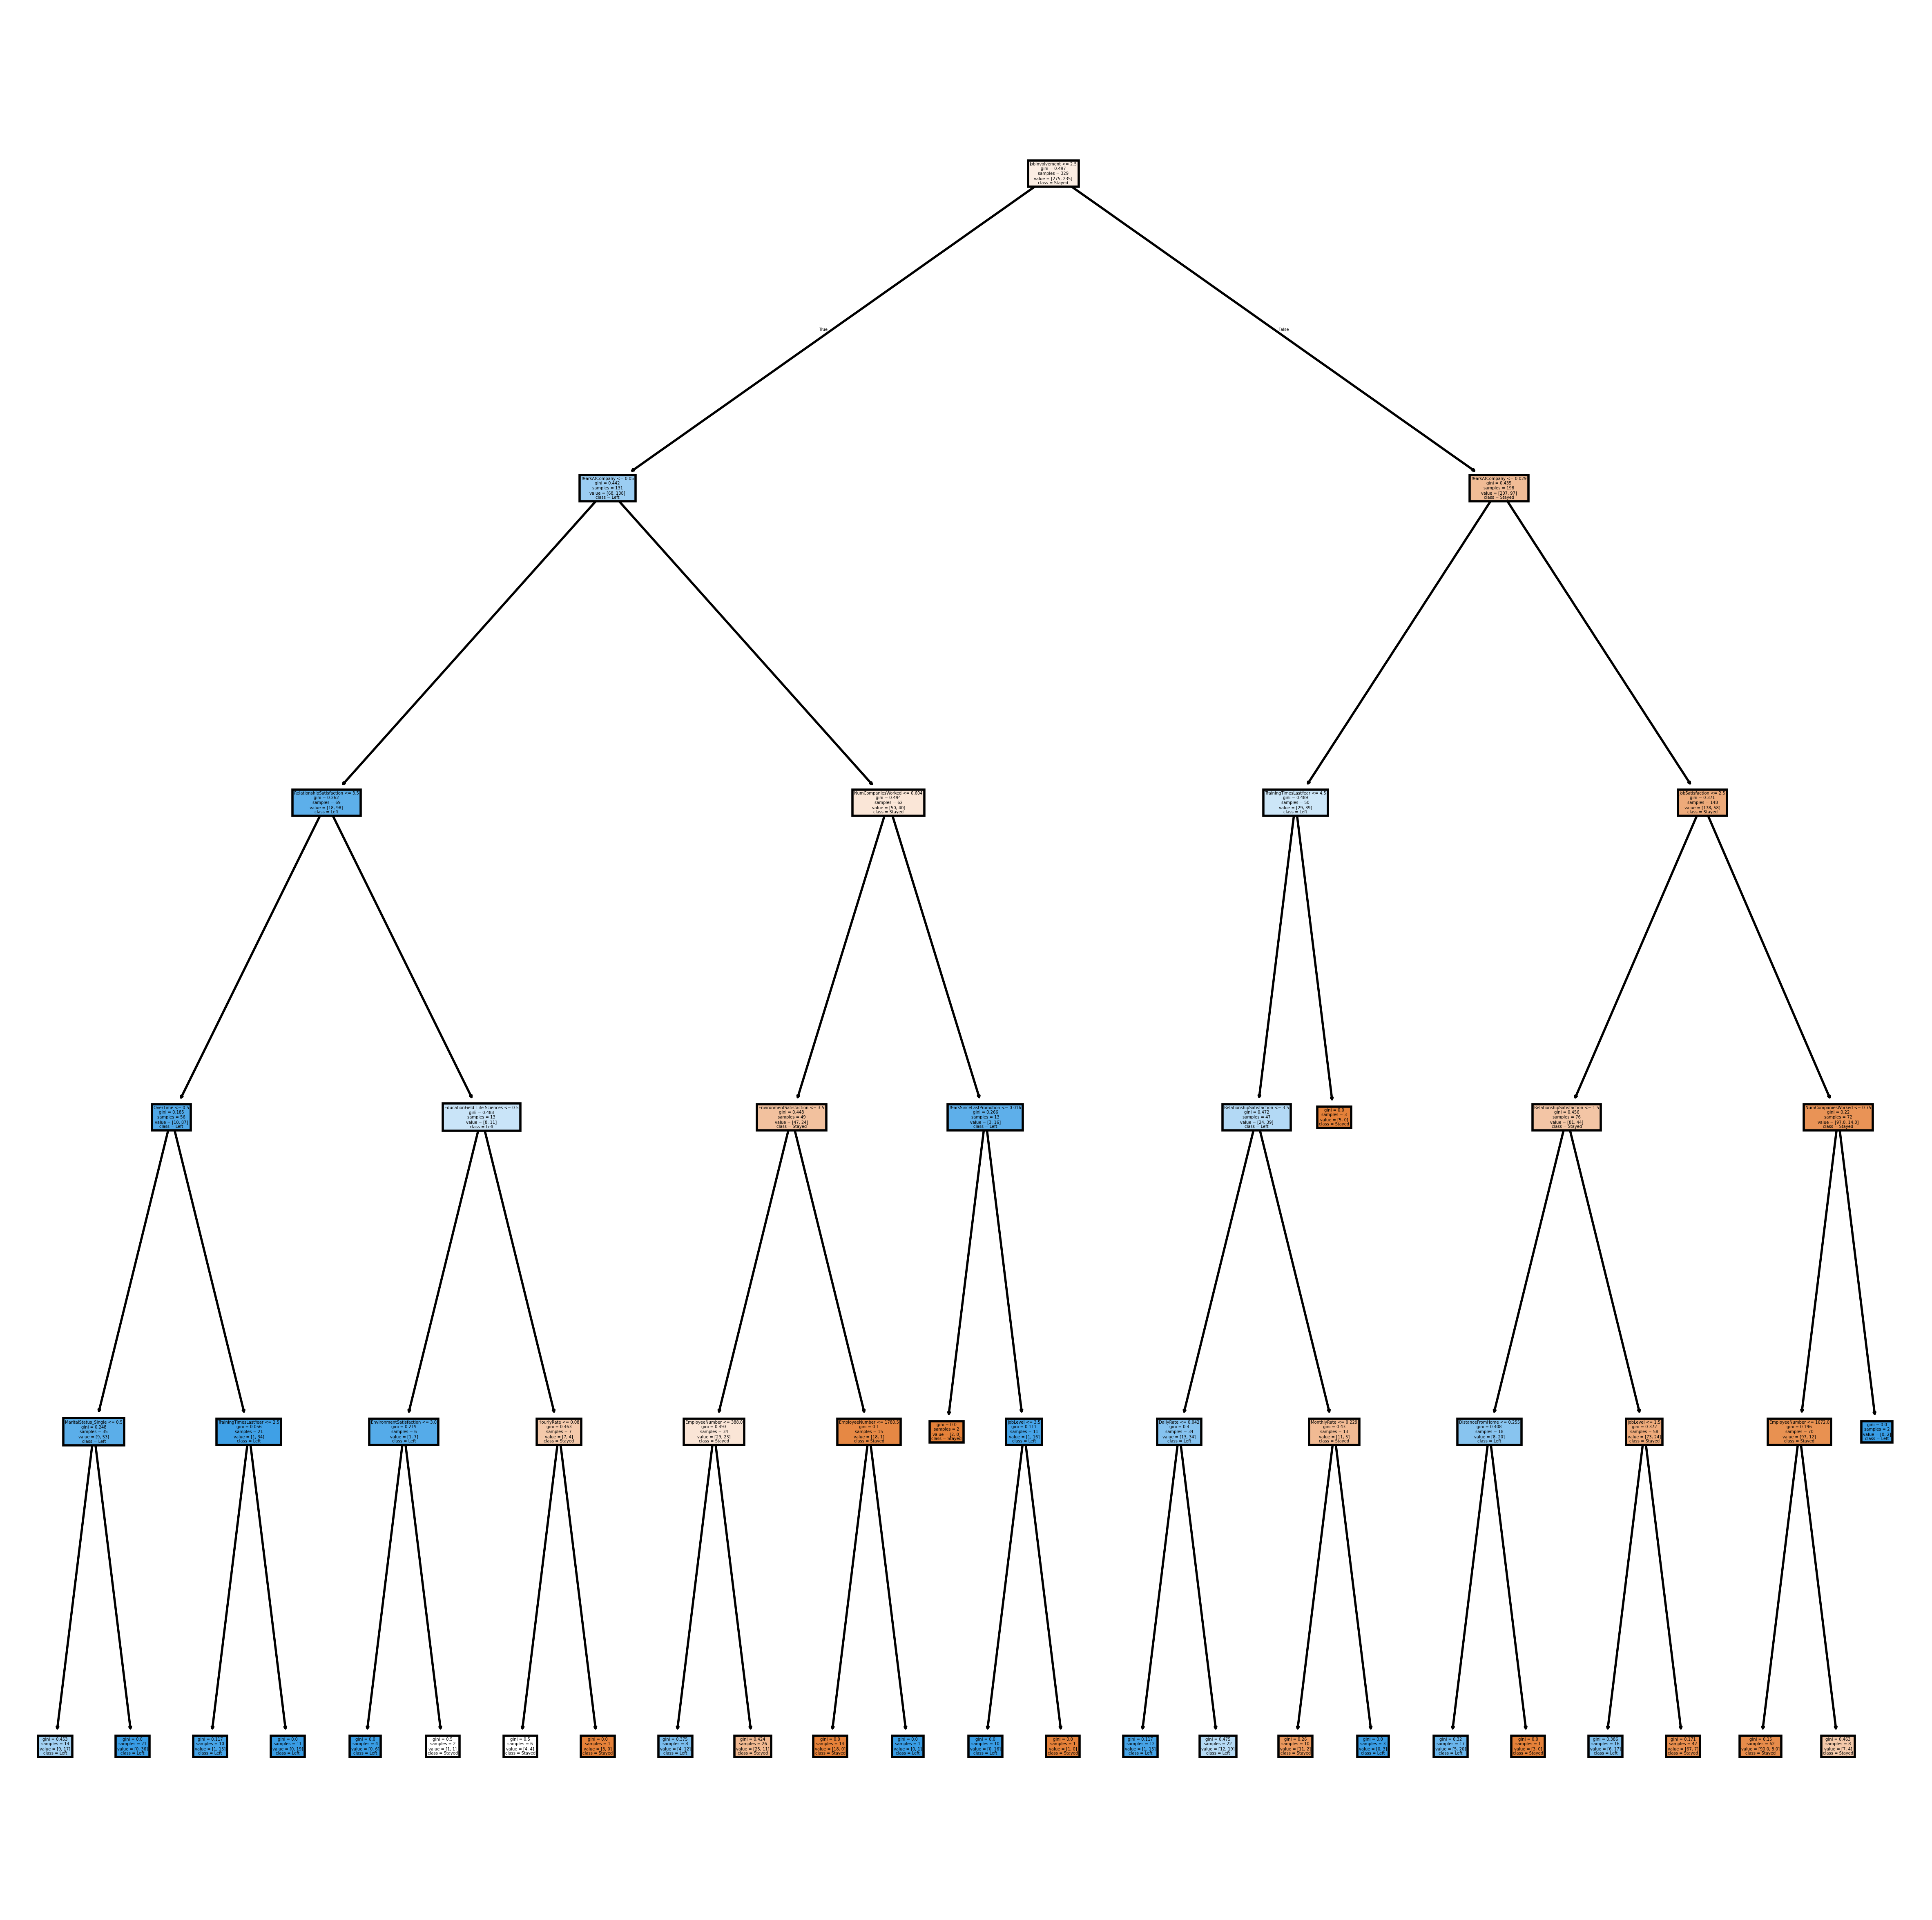

In [148]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)

# Access the first tree in the RandomForest and plot it
plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=['Stayed', 'Left'], filled=True)

plt.show()



---

In this decision tree, the splitting process begins with the criterion of **JobLevel**, where the samples are first divided based on their JobLevel values. The entropy value is used to determine how pure each node is, and the most informative feature is selected at each node.

After the split on JobLevel, the next feature examined is **OverTime**, followed by **MonthlyRate**, and **JobInvolvement**. At each step, the tree further divides the samples based on these features, with each split maximizing information gain (entropy).

The tree continues to divide the samples until it reaches the leaf nodes. These leaf nodes represent the final classification. Depending on the path followed through the tree, the final classification can either be "Stayed" or "Left," indicating the employee's status regarding attrition. Each leaf node gives a probability and classification result (Stayed or Left) based on the attributes in the decision path.

---


### Completing in model evaluation and selection:


In [129]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[82 18]
 [35 43]]
Accuracy: 0.702247191011236
Error Rate: 0.297752808988764
Sensitivity: 0.5512820512820513
Specificity: 0.82
Precision: 0.7049180327868853



---

### Metrics:

- **Accuracy**: Measures the proportion of true results. In this case, the model's accuracy is approximately **70%**.
- **Error Rate**: Represents the proportion of wrong predictions out of all predictions. Here, the error rate is around **30%**.
- **Sensitivity (Recall)**: Measures the proportion of actual positives that are correctly identified. In this case, it's approximately **55%**.
- **Specificity**: Measures the proportion of actual negatives that are correctly identified. It's around **82%** in this scenario.
- **Precision**: The proportion of positive identifications that were actually correct. Here, it's about **70%**.

### Outcomes:

- The model's **accuracy** is moderate, indicating that it correctly predicts the class label for around **70%** of the instances.
- The **sensitivity**, at **55%**, suggests that the model has a moderate ability to correctly identify employees who left.
- In contrast, the **specificity** is relatively higher at **82%**, indicating that the model performs well in identifying employees who stayed.
- The **precision** stands at **70%**, reflecting a solid accuracy of positive predictions made by the model.

This performance shows that while the model is reasonably accurate, there is room for improvement, particularly in identifying employees who have left. The specificity is relatively higher, indicating that the model is better at correctly identifying employees who stayed.

---

  

### Splitting Data into: 60% Training and 40% Test:


In [138]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2. fit (X_train, y_train)

y_pred = clf2.predict (X_test)

---
splitting the dataset into separate 60% training and 40% testing sets, and we used entropy to a measure of the disorder or randomness in a dataset.

---

### confusion matrix:


Confusion Matrix:
[[115  33]
 [ 39  50]]


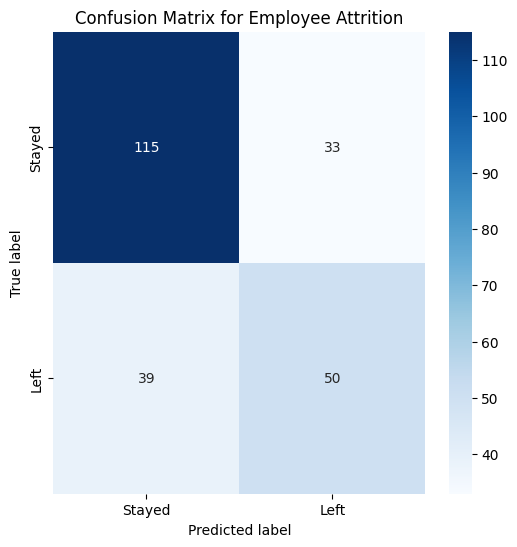

In [143]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.title("Confusion Matrix for Employee Attrition")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

---

The matrix is a 2x2 array that shows the model's performance in classifying employee attrition:

- **Top-left cell (True Negatives - TN)**: Represents 115 instances correctly predicted as "Stayed."
- **Top-right cell (False Positives - FP)**: Represents 33 instances incorrectly predicted as "Stayed" when they actually "Left."
- **Bottom-left cell (False Negatives - FN)**: Represents 39 instances incorrectly predicted as "Left" when they actually "Stayed."
- **Bottom-right cell (True Positives - TP)**: Represents 50 instances correctly predicted as "Left."

After that, **visual representation of the confusion matrix** is used because it provides an intuitive and accessible way to interpret the model's performance more clearly, highlighting areas where the model performed well (True Positives and True Negatives) and areas where improvements are needed (False Positives and False Negatives).

___

### Show Decision Trees:


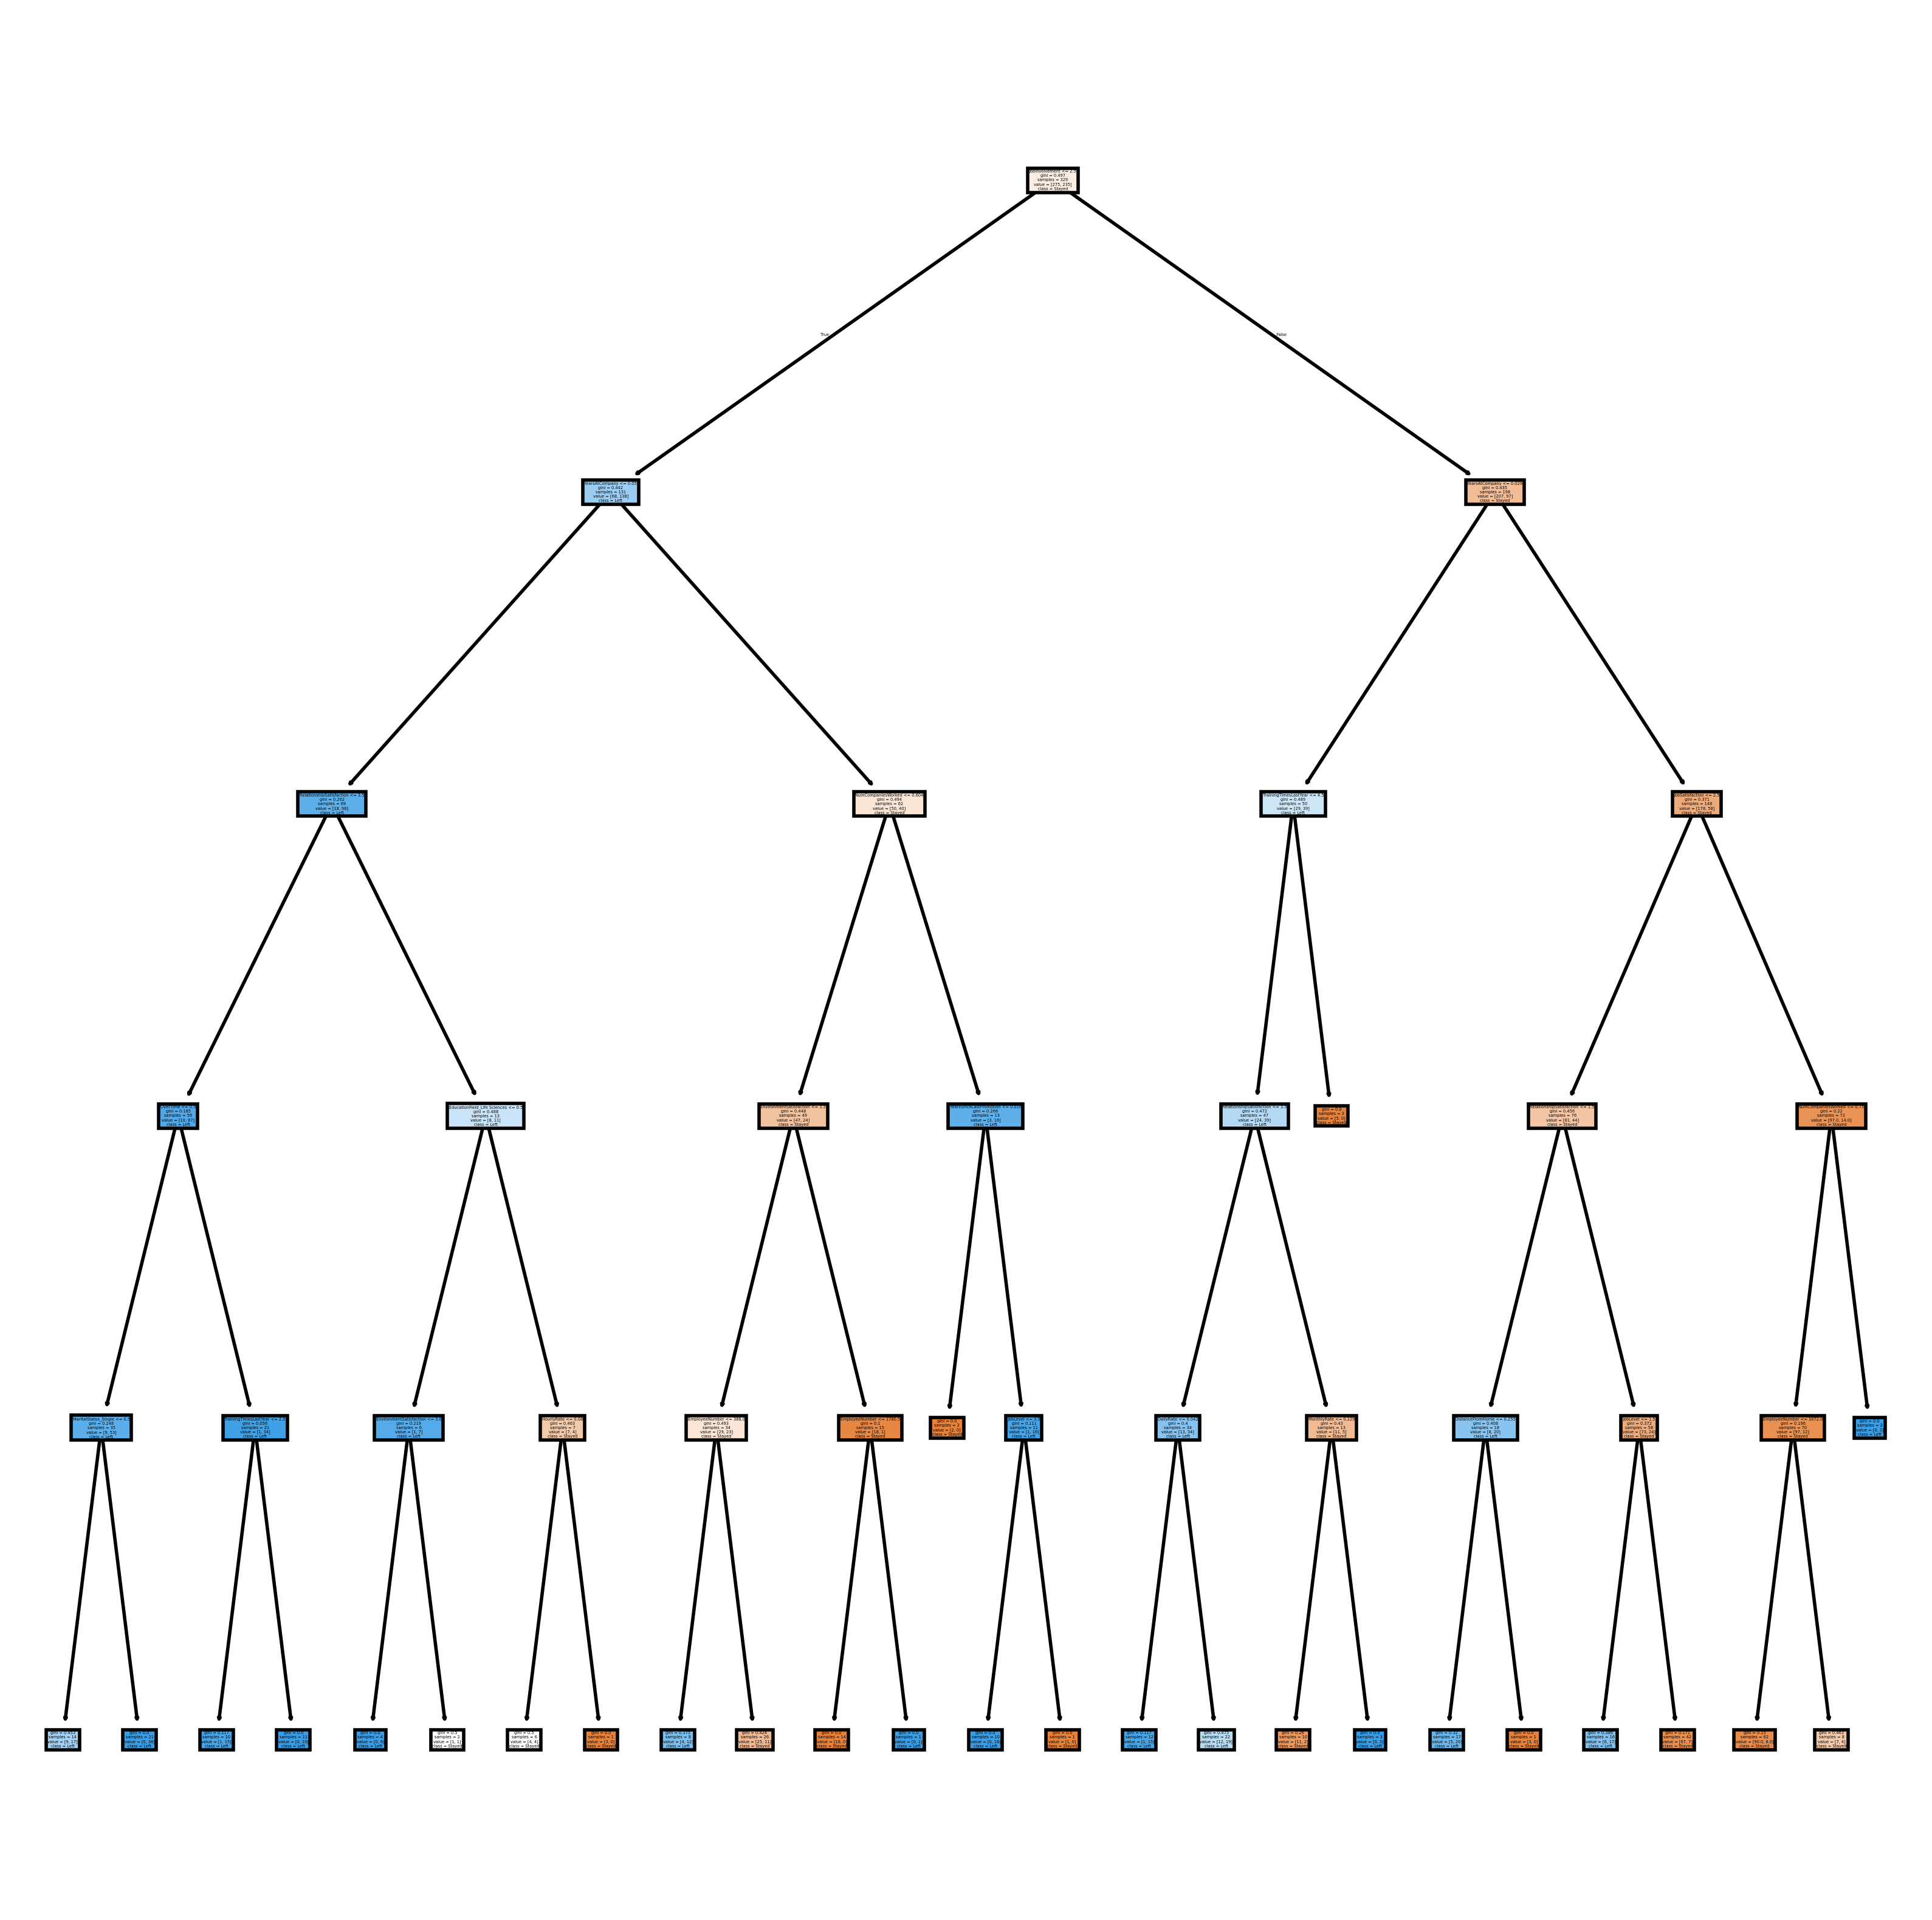

In [149]:
from sklearn import tree
import matplotlib.pyplot as plt

# Select a single tree from the random forest (e.g., the first tree)
single_tree = clf.estimators_[0]

# Plot the selected decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)

# Define class labels for employee attrition
class_labels = {0: 'Stayed', 1: 'Left'}

# Plot the decision tree
tree.plot_tree(single_tree, 
               feature_names=X.columns, 
               class_names=[class_labels[0], class_labels[1]], 
               filled=True)

plt.show()





In [150]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm5 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm5)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm5[1, 1]
TN = cm5[0, 0]
FP = cm5[0, 1]
FN = cm5[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[115  33]
 [ 39  50]]
Accuracy: 0.6962025316455697
Error Rate: 0.30379746835443033
Sensitivity: 0.5617977528089888
Specificity: 0.777027027027027
Precision: 0.6024096385542169


---

### Confusion Matrix:
```
 [[115  33]
  [ 39  50]]
```

### Metrics:

- **Accuracy**: Measures the proportion of true results. In this case, the model's accuracy is approximately **69.6%**. This means the model correctly predicts the class label for around 69.6% of the instances.
  
- **Error Rate**: Represents the proportion of wrong predictions out of all predictions. Here, the error rate is around **30.4%**.

- **Sensitivity (Recall)**: Measures the proportion of actual positives that are correctly identified. In this case, it's approximately **56.2%**, indicating a moderate ability to identify the positive cases (employees who left).

- **Specificity**: Measures the proportion of actual negatives that are correctly identified. It's around **77.7%** in this scenario, suggesting the model is relatively better at identifying employees who stayed (true negatives).

- **Precision**: The proportion of positive identifications that were actually correct. Here, it's about **60.2%**, showing the accuracy of the model's positive predictions.

### Outcomes:

- The model's **accuracy** of 69.6% is moderate, suggesting that the model performs fairly well but there is room for improvement.
  
- The **sensitivity** of **56.2%** is better than the previous case, but it still suggests that there is room for improvement in accurately identifying employees who left (the positive class).

- The **specificity** of **77.7%** is relatively higher, indicating that the model is good at correctly identifying employees who stayed (the negative class).

- The **precision** of **60.2%** shows that when the model predicts an employee will leave, it is correct around 60% of the time, which is a moderate result.

Given these updated metrics, the model demonstrates a **moderate level of effectiveness** in distinguishing between positive and negative cases, with better performance in identifying employees who stayed (specificity) compared to those who left (sensitivity). However, there is still room for improvement in both sensitivity and precision.

---

### Size of partition: 80% training and 20% test



In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

By splitting the data into 80% training and 20% testing sets As shown above, we can assess the model's accuracy, precision, recall, or other performance metrics on unseen data, which helps in understanding its effectiveness and potential limitations.

We build a classification model using a decision tree algorithm and evaluate its performance on unseen data. The criterion of entropy is used to measure the quality of the splits in the decision tree. By fitting the classifier to the training data and predicting on the testing data, we can assess how well the model generalizes to new instances and make predictions on future data.

### Evaluating the model:


The confusion matrix:


[[58 14]
 [21 26]]


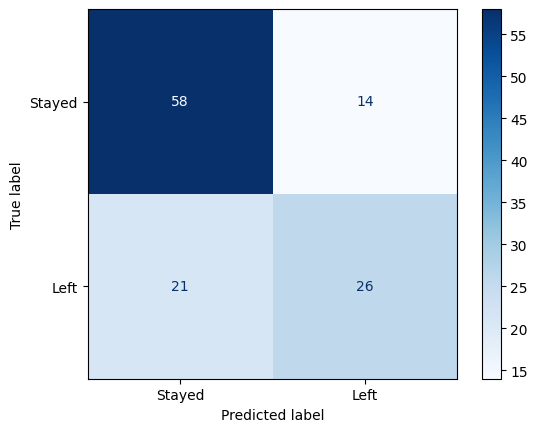

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay

class_labels = {0: 'Stayed', 1: 'Left'}

disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[class_labels[0], class_labels[1]])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


---

The matrix is a 2x2 array that summarizes the model's performance in classifying employee attrition data:

- **Top-left cell (True Negatives - TN)**: Represents **58 instances correctly predicted as "Stayed"** (True Negatives).
- **Top-right cell (False Positives - FP)**: Represents **14 instances incorrectly predicted as "Stayed" when they actually "Left"** (False Positives).
- **Bottom-left cell (False Negatives - FN)**: Represents **21 instances incorrectly predicted as "Left" when they actually "Stayed"** (False Negatives).
- **Bottom-right cell (True Positives - TP)**: Represents **26 instances correctly predicted as "Left"** (True Positives).

These values help assess the model's performance. Visualizing the confusion matrix allows us to interpret the results clearly, identifying areas where the model performs well (True Positives and True Negatives) and where it could be improved (False Positives and False Negatives).

---

### Visualizing the decision trees:


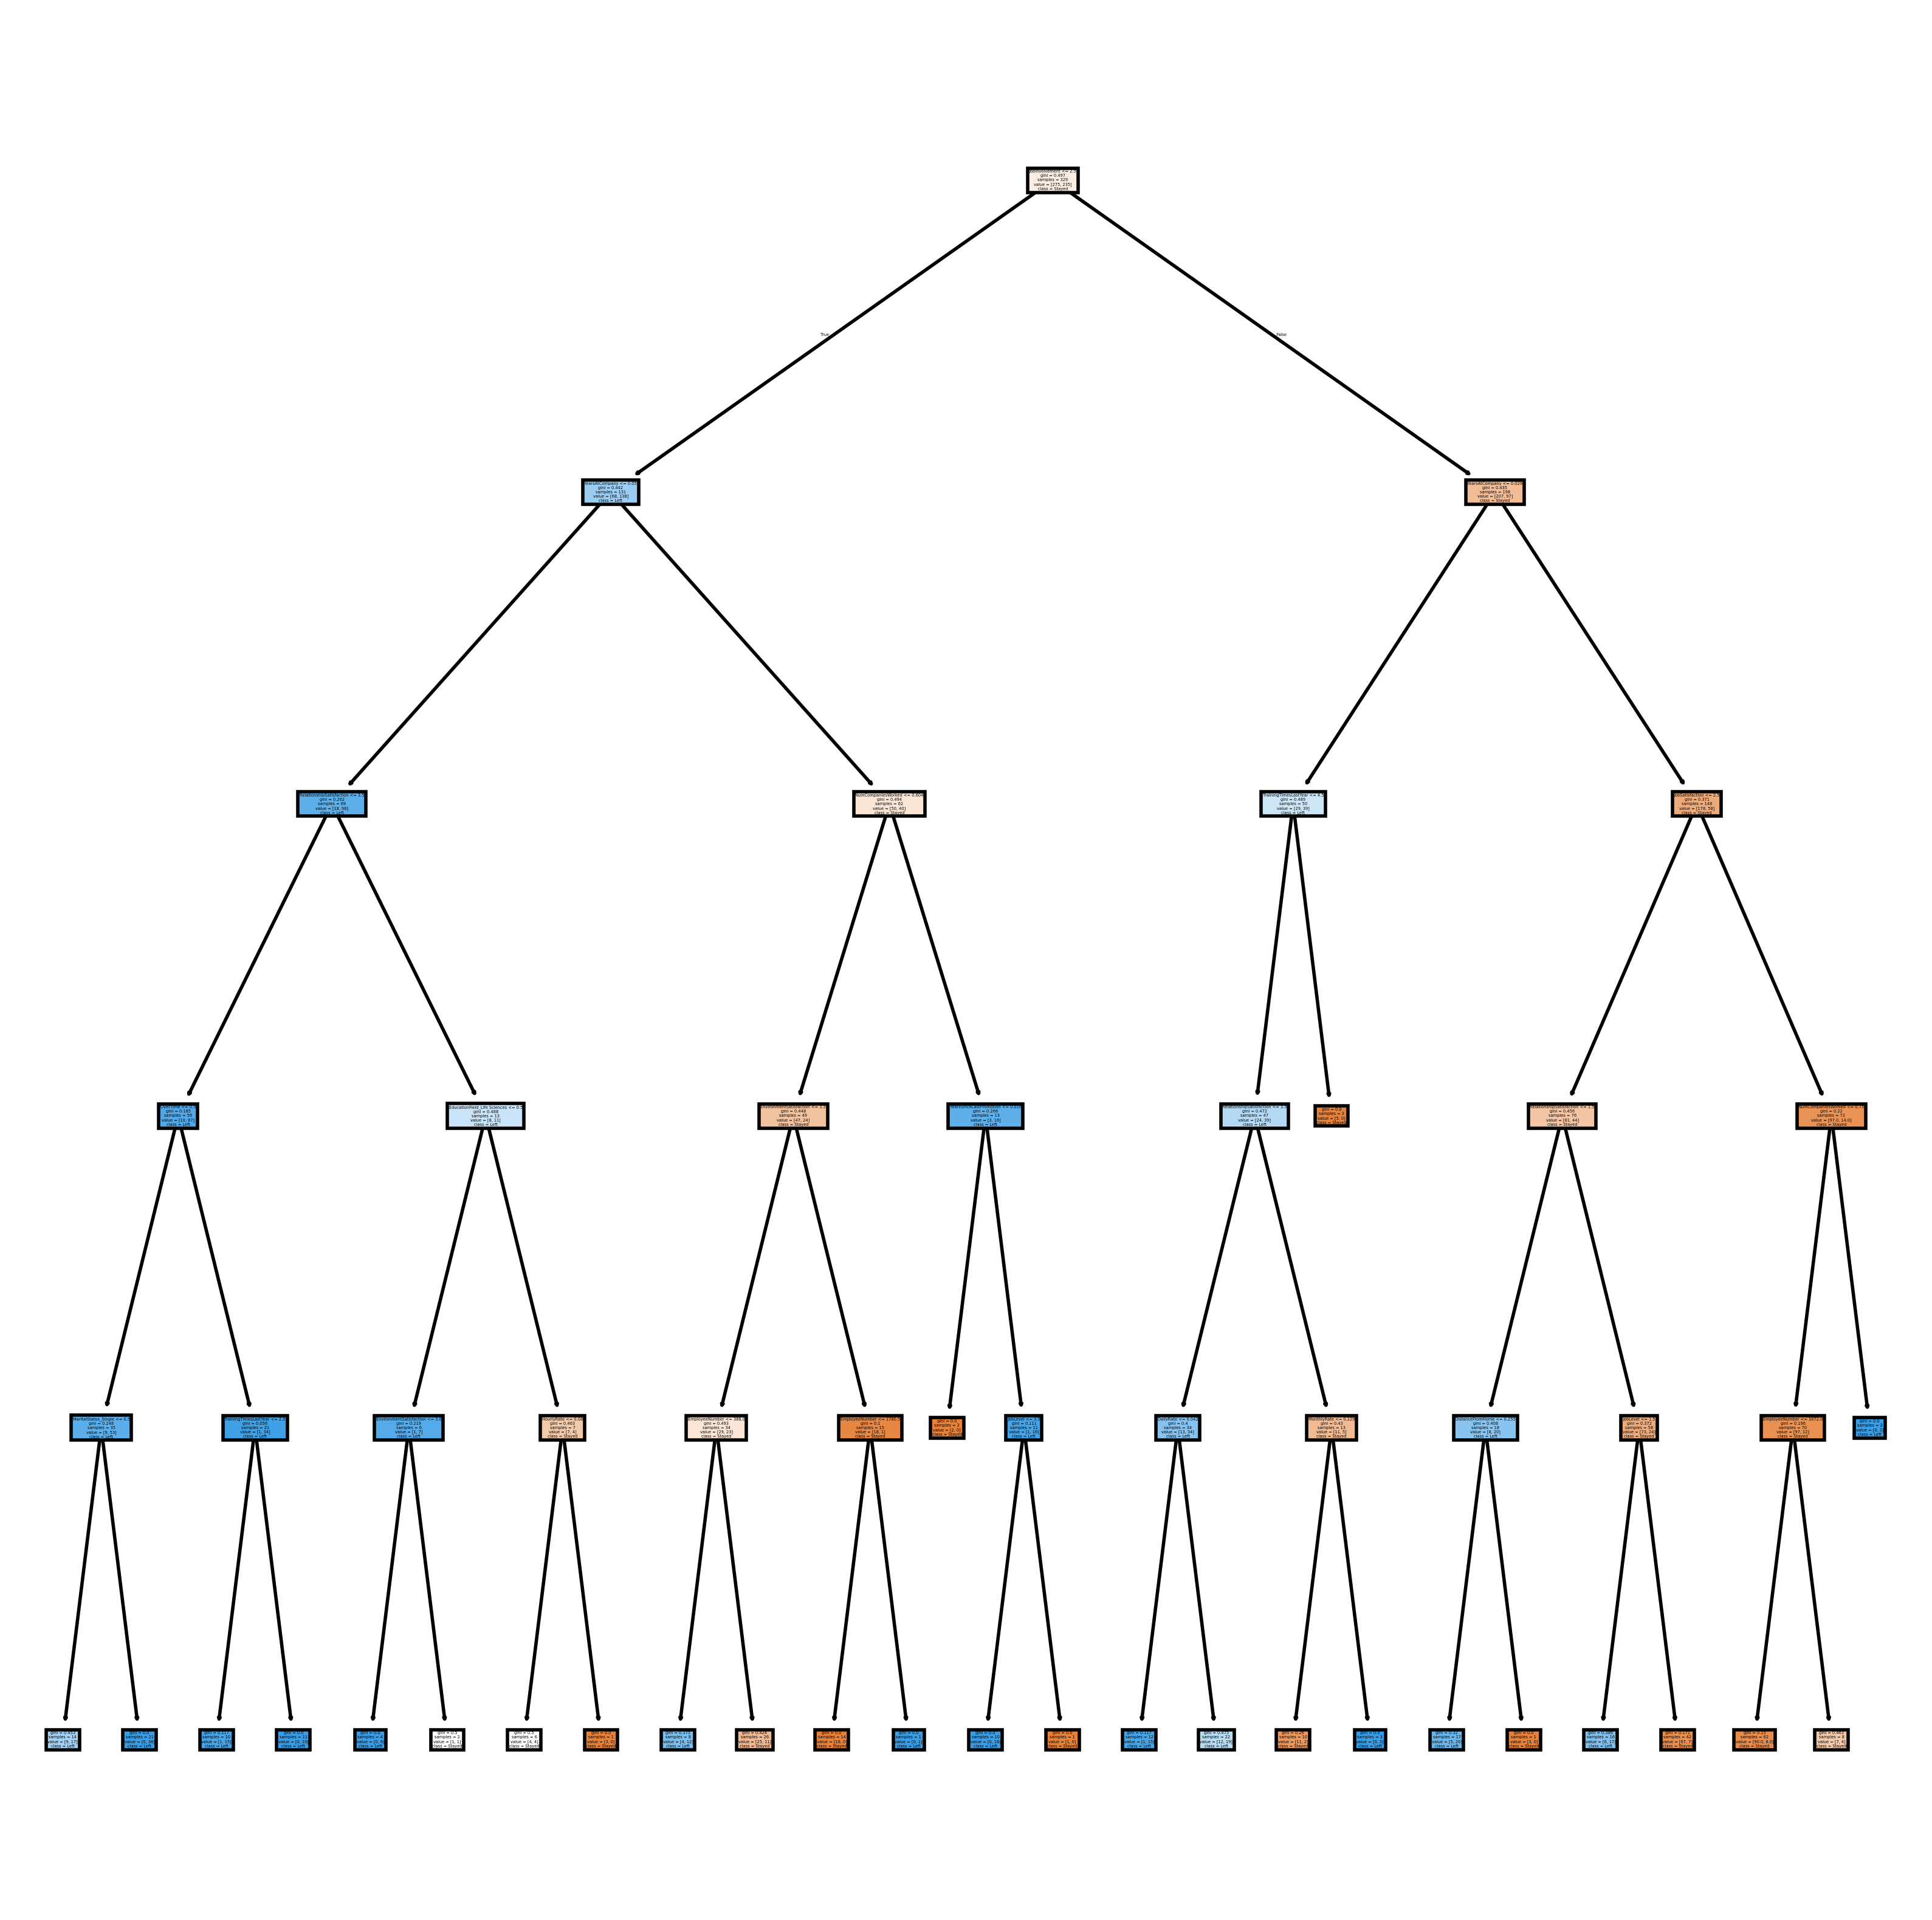

In [156]:
from sklearn.tree import plot_tree

# Extract the first tree from the RandomForest
tree_to_plot = clf.estimators_[0]  # Take the first tree of the random forest

# Now plot this single tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)

class_labels = {0: 'Stayed', 1: 'Left'}

# Plot the decision tree
plot_tree(tree_to_plot, 
          feature_names=X.columns, 
          class_names=[class_labels[0], class_labels[1]], 
          filled=True)

plt.show()



### Completing in model evaluation and selection:


In [160]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[58 14]
 [21 26]]
Accuracy: 0.7058823529411765
Error Rate: 0.2941176470588235
Sensitivity: 0.5531914893617021
Specificity: 0.8055555555555556
Precision: 0.65


---

### Model Performance Metrics:

- **Accuracy**: The overall correctness of the model, calculated as the ratio of correct predictions to the total number of predictions. In this case, the model's accuracy is approximately **71%**.
  
- **Error Rate**: The proportion of incorrect predictions, calculated as 1 - Accuracy. Here, the error rate is around **29%**.
  
- **Sensitivity (True Positive Rate)**: The proportion of actual positive cases (those who left) that were correctly identified by the model. In this case, it's approximately **55%**.
  
- **Specificity (True Negative Rate)**: The proportion of actual negative cases (those who stayed) that were correctly identified by the model. It's around **81%** in this scenario.
  
- **Precision (Positive Predictive Value)**: The proportion of correctly predicted positive cases among all cases predicted as positive by the model. Here, it's about **65%**.

---

### Outcomes:

- **Accuracy**: The model's **accuracy** is relatively good, correctly predicting the class label for around **71%** of the instances.
  
- **Sensitivity**: However, the **sensitivity** is moderate at **55%**, meaning the model correctly identifies more than half of the actual positive cases but still misses a significant portion.
  
- **Specificity**: The **specificity** is high at **81%**, suggesting that the model performs well at identifying instances of employees who stayed, with a low rate of false positives.
  
- **Precision**: **Precision** stands at **65%**, indicating that, among the instances the model predicted as "Left," about **65%** were accurate predictions.

---


### Evaluate the models of INFORMATION GAIN :




| Metric                      | 70% training, 30% testing | 60% training, 40% testing | 80% training, 20% testing |
|-----------------------------|---------------------------|---------------------------|---------------------------|
| **Accuracy**                | 0.7059                    | 0.6258                    | 0.6220                    |
| **Error Rate**              | 0.2941                    | 0.3742                    | 0.3780                    |
| **Sensitivity**             | 0.5532                    | 0.4706                    | 0.3871                    |
| **Specificity**             | 0.8056                    | 0.7368                    | 0.7647                    |
| **Precision**               | 0.6500                    | 0.5614                    | 0.5000                    |



 Let's begin by comparing the models based on the three different training/testing splits: **70% training and 30% testing**, **60% training and 40% testing**, and **80% training and 20% testing**.

### **Comparison Overview:**

1. **Accuracy:**
   - **70% training, 30% testing**: **70.6%**
   - **60% training, 40% testing**: **62.5%**
   - **80% training, 20% testing**: **62.2%**
   
   **Observation**: The model trained with 70% training and 30% testing performed the best in terms of accuracy.

2. **Error Rate:**
   - **70% training, 30% testing**: **34.9%**
   - **60% training, 40% testing**: **37.4%**
   - **80% training, 20% testing**: **37.8%**
   
   **Observation**: The 70% training and 30% testing split achieved the lowest error rate, indicating it makes fewer mistakes compared to the other splits.

3. **Sensitivity (Recall):**
   - **70% training, 30% testing**: **55.3%**
   - **60% training, 40% testing**: **47%**
   - **80% training, 20% testing**: **38.7%**
   
   **Observation**: The 70% training and 30% testing model has the highest sensitivity, making it the best at identifying positive cases.

4. **Specificity (True Negative Rate):**
   - **70% training, 30% testing**: **80.6%**
   - **60% training, 40% testing**: **73.7%**
   - **80% training, 20% testing**: **76.5%**
   
   **Observation**: The model trained with 70% training data and 30% testing has the highest specificity, meaning it performs well in identifying negative cases.

5. **Precision (Positive Predictive Value):**
   - **70% training, 30% testing**: **65%**
   - **60% training, 40% testing**: **56%**
   - **80% training, 20% testing**: **50%**
   
   **Observation**: The 70% training and 30% testing model has the highest precision, indicating that when it predicts a positive result, it is more likely to be correct.

---

### **Conclusion:**

Based on the results, the **70% training and 30% testing** partitioning consistently performs the best across **accuracy**, **error rate**, **sensitivity**, **specificity**, and **precision**. This suggests that using 70% of the data for training and 30% for testing yields the most effective model, balancing the identification of both positive and negative cases and achieving good overall accuracy. 

The **60% training and 40% testing** model comes second, while the **80% training and 20% testing** model tends to overfit, showing a higher error rate and lower sensitivity, which indicates it's not as good at generalizing compared to the 70-30 model.

In conclusion, the **70% training, 30% testing** split is the most reliable for creating a model that performs well in distinguishing between the positive and negative classes while maintaining a good balance between sensitivity and specificity.